In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

In [4]:
## Paths Input Here
conn_path = 'path to connect values'
clin_path = r'C:\Users\Calvin Howard\Dropbox (Partners HealthCare)\memory\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
# clin_path = 'path to clinical values'

out_dir = r'path to out dir here'

## Import Connectivity Values

In [ ]:
corr_df = pd.read_csv(conn_path)
corr_df.tail(3)

In [ ]:
#Assess connectivity values fundamentally
corr_description = corr_df.describe.T
display(corr_description)

In [ ]:
#Visualize fundamental relations of the connectivity values
corrfig = sns.pairplot(corr_df)
corrfig

## Import Clinical Outcomes

In [60]:
#important metrics: 
# pt_id, randomization arm, age at DOS,
# baseline adas cog 11, baseline CDR
# %change adas cog 11, # change CDR


sheet_name = 'AD_Clinical_Scores'
alphab_cols = 'C, D, E, F, G, J, V'
clin_df = pd.read_excel(clin_path, sheet_name=sheet_name, usecols=alphab_cols, nrows=50)
print('Num NaNs: ', clin_df.isna().sum().sum())
# clin_df.tail(5)
display(clin_df[::2])

Num NaNs:  32


,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
0,sham-stim,101,62,28.0,5.0,-21.428571,-40.000000
2,sham-stim,103,76,19.0,7.0,-78.947368,-42.857143
4,NaN,105,50,19.0,NaN,-10.526316,NaN
6,NaN,107,64,13.0,NaN,-15.384615,NaN
8,sham-stim,109,72,23.0,9.0,-30.434783,-44.444444
10,NaN,111,62,12.0,NaN,41.666667,NaN
12,stim-sham,113,69,15.0,5.5,-60.000000,-100.000000
14,NaN,115,60,29.0,NaN,-48.275862,NaN
16,sham-stim,118,52,32.0,6.0,-3.125000,-100.000000
18,NaN,1201,78,19.6,NaN,-7.142857,NaN


In [56]:
## Organize the clinical dataframe
clin_df = clin_df.sort_values(by=['Patient # CDR, ADAS'], kind='quicksort', axis=0, ascending=True, ignore_index=True)
clin_df.tail(10)

,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
40,stim-sham,144,79,13.0,3.0,-61.538462,-133.333333
41,stim-sham,145,74,18.0,3.5,5.555556,-100.000000
42,sham-stim,146,76,11.0,4.0,-54.545455,-50.000000
43,stim-sham,147,59,21.0,3.0,-4.761905,-100.000000
44,stim-sham,148,51,13.0,3.5,-207.692308,-157.142857
45,sham-stim,149,77,10.0,5.0,-90.000000,-20.000000
46,sham-stim,150,71,22.0,4.5,13.636364,0.000000
47,NaN,1201,78,19.6,NaN,-7.142857,NaN
48,NaN,1202,74,13.3,NaN,-2.255639,NaN
49,NaN,1203,76,24.0,NaN,-73.333333,NaN


In [57]:
##One-hot-encode the dataframe | sham=0 stim=1 
shams = (clin_df['Randomization Arm'] == 'sham-stim')
clin_df.loc[shams, 'Randomization Arm'] = 0
stims = (clin_df['Randomization Arm'] == 'stim-sham')
clin_df.loc[stims, 'Randomization Arm'] = 1
clin_df.tail(10)

,Randomization Arm,"Patient # CDR, ADAS",Age at DOS,Baseline ADAS-Cog11,Baseline CDR (sum of squares),% Change from baseline (ADAS-Cog11),% Change from baseline (CDR)
40,1,144,79,13.0,3.0,-61.538462,-133.333333
41,1,145,74,18.0,3.5,5.555556,-100.000000
42,0,146,76,11.0,4.0,-54.545455,-50.000000
43,1,147,59,21.0,3.0,-4.761905,-100.000000
44,1,148,51,13.0,3.5,-207.692308,-157.142857
45,0,149,77,10.0,5.0,-90.000000,-20.000000
46,0,150,71,22.0,4.5,13.636364,0.000000
47,NaN,1201,78,19.6,NaN,-7.142857,NaN
48,NaN,1202,74,13.3,NaN,-2.255639,NaN
49,NaN,1203,76,24.0,NaN,-73.333333,NaN


In [58]:
## Develop Understanding of the Clinical Data
try:
    clin_description = clin_df.describe.T
    display(clin_description)
except:
    print('Failed to describe clinical dataframe, unknown cause')

Failed to describe clinical dataframe, unknown cause


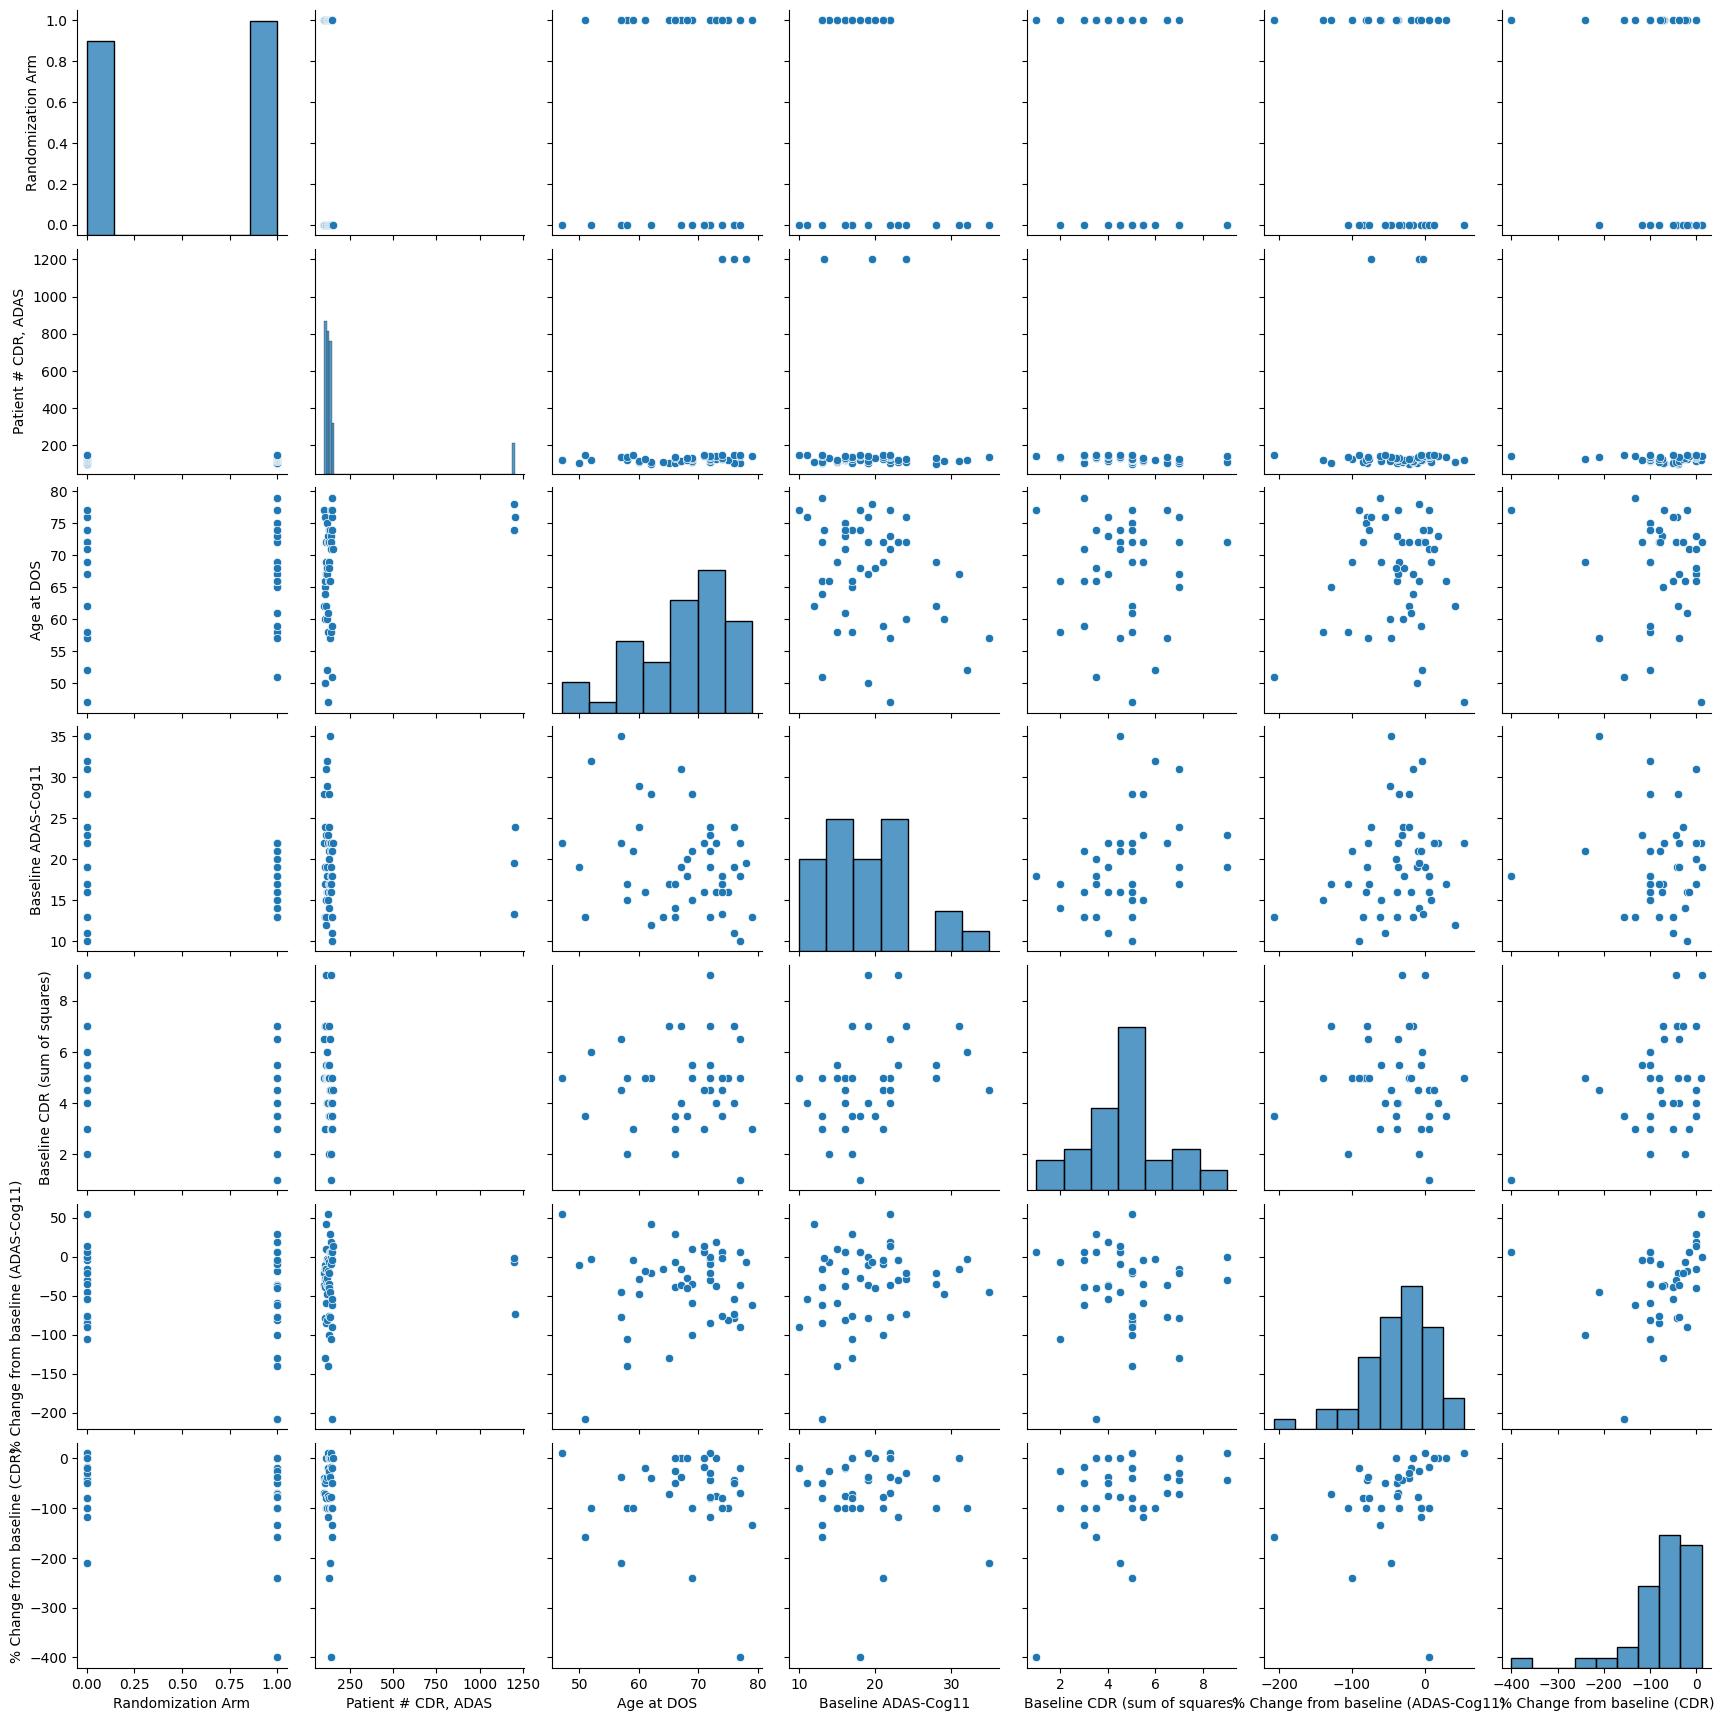

In [59]:
## Visualize the Data Relationships
clinfig = sns.pairplot(clin_df)
clinfig

## Merge DFs

In [ ]:
total_df = pd.merge([clin_df, corr_df])
display(total_df)

In [ ]:
#Generate metrics for udnerstanding
try:
    total_desc = total_df.description.T
    total_desc
except:
    print('Failed to generate total metrics, unkown cause')

In [ ]:
#Generate visual relationship of total metrics
total_pairplot = sns.pairplot(total_df)
total_pairplot

## Generate Subrouping Metric

In [ ]:
#subgrouping by age
metric = 'Age at DOS'
metric_val = 65

index_one = (total_df[metric] > metric_val) #example, all individuals over 65
index_two = (total_df[metric] <= metric_val) #example, all individuals under/equal to 65

##Example of how to use these indices to manipulate data:
#### clin_df.loc[index_one, '<names of relevant columns>'] = 0 ## can use iloc too. 

## Decide What to Plot

In [ ]:
## Choose variables of interest.
x_vals = total_df['00_memor']
z_vals = total_df['% Change from baseline (ADAS-Cog11)']
y_vals = total_df['Baseline ADAS-Cog11']

In [1]:
#2D Line of Best Fit Code
def lin_regression(x, y, z, degree):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from scipy.stats import pearsonr

    #----Generate Model
    #Prep data
    x = x
    y = y
    z = z
    input_matrix = np.stack([x, y]).T

    #Linear Regression
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    in_features = poly.fit_transform(input_matrix)
    model.fit(in_features, z)
    predicted_z = model.predict(poly.transform(input_matrix))

    #----Performance Metrics
    #Pearson of Predicted Z to Actual Z
    r, p = pearsonr(predicted_z, z) #need to find the prediction points at the x/y for each z_actual
    print('r: ', r)
    print('p: ', p)
    #Coefficients of the Regression
    coefficients = dict(zip(poly.get_features_out(), model.coef_.round(4)))
    print('coeff: ', coefficients)
    #Check Fit
    r_squared = model.score(poly.transform(input_matrix), z)
    print('r2: ', r_squared)

    #----Generate Planes for Plotting
    x_lin=np.linspace(np.min(x), np.max(x), 100)
    y_lin=np.linpsace(np.min(y), np.max(y), 100)
    X_plane,Y_plane=np.meshgrid(x_lin,y_lin,copy=False)
    input_planes=np.stack([X_plane,Y_plane]).T
    assert(input_planes.shape==(100*100, 2)) #unsure what shape 400,2 refers to
    predicted_plane = model.predict(poly.transform(input_planes))


    return coefficients, r_squared, r, p, X_plane, Y_plane, predicted_plane


In [ ]:
#Plot
plt.style.use('default')

#setup
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121, projection = '3d')
ax1.view_init(elev=13, azim=100)
ax2 = fig.add_subplot(132, projection = '3d')
ax2.view_init(elev=13, azim=145)
ax3 = fig.add_subplot(133, projection = '3d')
ax3.view_init(elev=13, azim=190)

ax1.set_zlabel(z_vals.columns.values, fontsize='10')
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(x=x_vals.loc[index_one], y=y_vals.loc[index_one], z=z_vals.loc[index_one], color='r', zorder=15, alpha=0.5, marker='o')
    ax.plot(x=x_vals.loc[index_two], y=y_vals.loc[index_two], z=z_vals.loc[index_two], color='b', zorder=15, alpha=0.5, marker='o')

    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=4, axis='x')

    ax.set_xlabel(x_vals.columns.values, fontsize='10')
    ax.set_ylabel(y_vals.columns.values, fontsize='10')

    #Perform each regression
    coeffic1, r_sq1, r1, p1, x_plane1, y_plane1, z_plane1 = lin_regression(x=x_vals.loc[index_one], y=y_vals.loc[index_one], z=z_vals.loc[index_one], degree=1)
    coeffic2, r_sq2, r2, p2, x_plane2, y_plane2, z_plane2 = lin_regression(x=x_vals.loc[index_two], y=y_vals.loc[index_two], z=z_vals.loc[index_two], degree=1)

    ax.plot(x_plane1, y_plane1, z_plane1, color='r', zorder=15, marker=',')
    ax.plot(x_plane2, y_plane2, z_plane2, color='r', zorder=15, marker=',')

fig.suptitle(f'{metric}>{metric_val} R2:{r_sq1}|r:{r1}|p:{p1} \n {metric}<{metric_val} R2:{r_sq2}|r:{r2}|p{p2}')


In [ ]:
#Store the associated coefficients and outputs in a CSV 
coeff_df = pd.DataFram({f'{metric}>{metric_val}': coeffic1, f'{metric}<{metric_val}': coeffic2})
display(coeff_df)

In [ ]:
#Save
figname = '3D_' + x_vals.columns.values + '_by_' + y_vals.columns.values + '_explain_' + z_vals.columns.values
if os.path.isdir(out_dir) != True:
    os.mkdir(out_dir)
fig.savefg(os.path.join(out_dir, (figname+'_figure.png')))
coeff_df.to_csv(os.path.join(out_dir, (figname+'_coefficients.csv')))